# Helicopter Prison Break

Prison escapes by means of helicopter has been attempted throughout the years.

The purpose of this project is to identify:
1. Which country has highest occurrence of prison breaks by helicopter

2. Which year saw the greatest number of prison break attempts

This project will extract and use the dataset published on Wikipedia which provides a [list of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts). Information on the date of the attempt and the country in which the attempted occurred is also included in the dataset.

## Getting the Data

In [1]:
# import helper function
from helper import *

In [2]:
# data extraction
data = data_from_url('https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes')
for attempt in data[:3]:
    print(attempt)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 

## Cleaning the Data

To clean up the data, the last element of each recorded prison break attempt will be removed from the dataset. This will remove the 'Details' of the prison break which contains lots of information not is not necessary for the purpose of the project.

In [3]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

In [4]:
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Extracting the Year

In [5]:
for prison_break in data:
    year = fetch_year(prison_break[0])
    prison_break[0] = year

print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Attempts per Year

In [6]:
years = list()
for record in data:
    years.append(record[0])

print(years)

[1971, 1973, 1978, 1981, 1981, 1983, 1985, 1985, 1986, 1986, 1986, 1987, 1988, 1989, 1989, 1990, 1991, 1992, 1992, 1993, 1996, 1997, 1999, 2000, 2000, 2001, 2001, 2001, 2002, 2002, 2003, 2005, 2005, 2006, 2007, 2007, 2007, 2009, 2009, 2009, 2010, 2012, 2013, 2013, 2014, 2016, 2018, 2020]


In [7]:
d = dict()
for i in years:
    if i not in d:
        d[i] = 1
    else:
        d[i] = d[i] + 1

print(d)

{1971: 1, 1973: 1, 1978: 1, 1981: 2, 1983: 1, 1985: 2, 1986: 3, 1987: 1, 1988: 1, 1989: 2, 1990: 1, 1991: 1, 1992: 2, 1993: 1, 1996: 1, 1997: 1, 1999: 1, 2000: 2, 2001: 3, 2002: 2, 2003: 1, 2005: 2, 2006: 1, 2007: 3, 2009: 3, 2010: 1, 2012: 1, 2013: 2, 2014: 1, 2016: 1, 2018: 1, 2020: 1}


In [8]:
attempts_per_year = d.items()
print(attempts_per_year)

dict_items([(1971, 1), (1973, 1), (1978, 1), (1981, 2), (1983, 1), (1985, 2), (1986, 3), (1987, 1), (1988, 1), (1989, 2), (1990, 1), (1991, 1), (1992, 2), (1993, 1), (1996, 1), (1997, 1), (1999, 1), (2000, 2), (2001, 3), (2002, 2), (2003, 1), (2005, 2), (2006, 1), (2007, 3), (2009, 3), (2010, 1), (2012, 1), (2013, 2), (2014, 1), (2016, 1), (2018, 1), (2020, 1)])


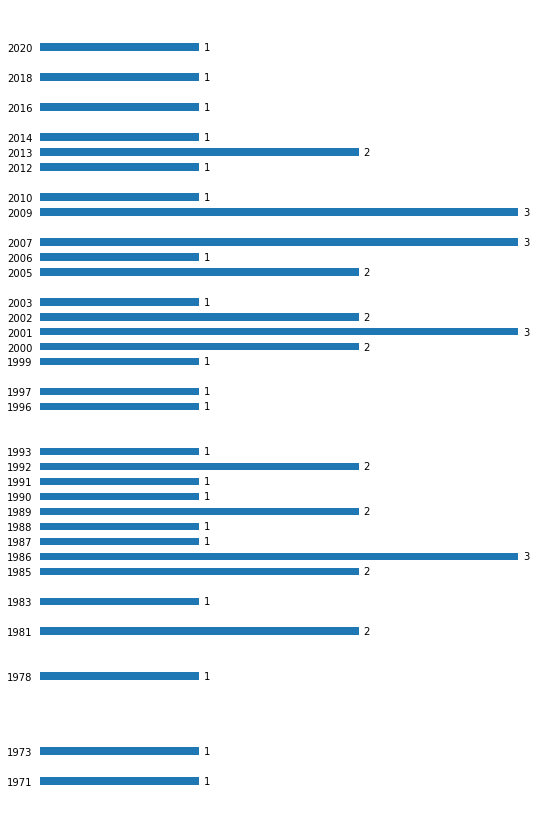

In [9]:
%matplotlib inline
barplot(attempts_per_year)

## Attempts by Country

In [10]:
countries = list()
for record in data:
    countries.append(record[2])

print(countries)

['Mexico', 'Ireland', 'United States', 'France', 'Canada', 'Australia', 'United States', 'Brazil', 'France', 'United States', 'Italy', 'United Kingdom', 'United States', 'United States', 'United States', 'Canada', 'Puerto Rico', 'France', 'France', 'France', 'Chile', 'Netherlands', 'Australia', 'United States', 'France', 'France', 'France', 'France', 'Brazil', 'United States', 'France', 'France', 'France', 'Greece', 'Belgium', 'France', 'Belgium', 'Greece', 'France', 'Belgium', 'United Kingdom', 'Russia', 'Greece', 'Canada', 'Canada', 'Greece', 'France', 'Belgium']


In [11]:
dc = {}
for country in countries:
    dc[country] = dc.get(country, 0) + 1

print(dc)

{'Mexico': 1, 'Ireland': 1, 'United States': 8, 'France': 15, 'Canada': 4, 'Australia': 2, 'Brazil': 2, 'Italy': 1, 'United Kingdom': 2, 'Puerto Rico': 1, 'Chile': 1, 'Netherlands': 1, 'Greece': 4, 'Belgium': 4, 'Russia': 1}


In [12]:
attempts_per_country = dc.items()
print(attempts_per_country)

dict_items([('Mexico', 1), ('Ireland', 1), ('United States', 8), ('France', 15), ('Canada', 4), ('Australia', 2), ('Brazil', 2), ('Italy', 1), ('United Kingdom', 2), ('Puerto Rico', 1), ('Chile', 1), ('Netherlands', 1), ('Greece', 4), ('Belgium', 4), ('Russia', 1)])


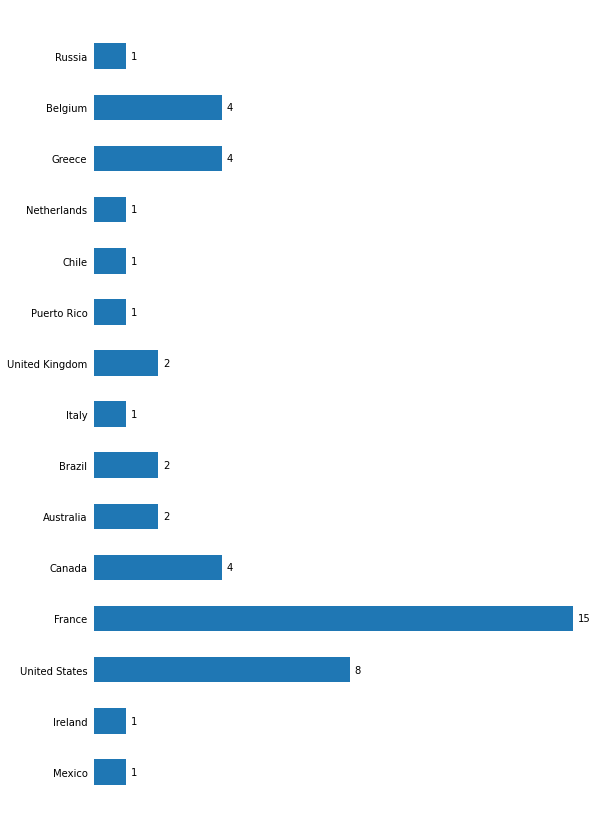

In [13]:
%matplotlib inline
barplot(attempts_per_country)

In [14]:
countries_frequency = df.groupby("Country").count()
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
United Kingdom,2
Brazil,2
Australia,2
Netherlands,1
Ireland,1
